# Run Scores 2
*pyscores2* is a python package that helps with running fortran program *Scores2*. 
The *pyscores2* helps out with the following:
1. Load an modify input files to *Scores2*
* Run *Scores2*
* Load and parse output files from *Scores2*

## 1. Load an modify input files to *Scores2*

In [1]:
from pyscores2.indata import Indata
import pyscores2.test
import pandas as pd
import matplotlib.pyplot as plt

c:\python35-32\lib\site-packages\matplotlib\style\core.py:167: UserWarning: In C:\Users\maa\.matplotlib\stylelib\paper.mplstyle: Duplicate key in file "C:\Users\maa\.matplotlib\stylelib\paper.mplstyle", line #461
  styles = read_style_directory(stylelib_path)
c:\python35-32\lib\site-packages\matplotlib\style\core.py:167: UserWarning: In C:\Users\maa\.matplotlib\stylelib\paper.mplstyle: Duplicate key in file "C:\Users\maa\.matplotlib\stylelib\paper.mplstyle", line #462
  styles = read_style_directory(stylelib_path)


An input file looks something like this:

In [2]:
indata_path = pyscores2.test.indata_path
with open(indata_path, mode='r') as file:
    print(file.read())

Ship indata
 1 0 0 0 1 0 0 0 0 120 2 0 0 0 0
326.600   1.025     9.80665   332793.0  
2.0000    0.1071    22.0000   0.00   
36.7000   0.8072    22.0000   0.00
49.7400   0.8581    22.0000   0.00
55.7400   0.9054    22.0000   0.00
57.6800   0.9560    22.0000   0.00
58.0000   0.9879    22.0000   0.00
58.0000   0.9970    22.0000   0.00
58.0000   0.9974    22.0000   0.00
58.0000   0.9974    22.0000   0.00
58.0000   0.9974    22.0000   0.00
58.0000   0.9974    22.0000   0.00
58.0000   0.9974    22.0000   0.00
58.0000   0.9912    22.0000   0.00
58.0000   0.9680    22.0000   0.00
58.0000   0.9244    22.0000   0.00
58.0000   0.8514    22.0000   0.00
57.2800   0.7577    22.0000   0.00
54.7800   0.6540    22.0000   0.00
48.5800   0.5447    22.0000   0.00
37.3600   0.3708    22.0000   0.00
22.2000   0.6987    5.3900    0.00
1.00      15.00     
78.38     154.13    
         0        10         1
1.0       50.00     700.00    50.00      5.000    10.000    5.000
0.0850    
180.0     360.0     30.0  

And it can be stored in an *Indata* object that looks like:

In [3]:
import pprint
pp = pprint.PrettyPrinter(indent=2)

indata = Indata()
pp.pprint(indata.__dict__)


{ 'accelerationPoints': [],
  'bs': [],
  'cScores': [],
  'displacement': 0.0,
  'draught': 0.0,
  'g': 9.80665,
  'kxx': 0.0,
  'kyy': 0.0,
  'lcb': 0.0,
  'lines': '',
  'lpp': 0.0,
  'partOfCriticalRollDamping': 0.0,
  'projectName': 'New Project',
  'rho': 1025.0,
  'runOptionTags': [ 'IA',
                     'IB',
                     'IC',
                     'ID',
                     'IE',
                     'IF',
                     'IG',
                     'IH',
                     'II',
                     'IJ',
                     'N',
                     'IK',
                     'IL',
                     'IM',
                     'NMOT',
                     'NMOOR'],
  'runOptions': { 'IA': <pyscores2.indata.RunOption object at 0x0C322590>,
                  'IB': <pyscores2.indata.RunOption object at 0x0C322610>,
                  'IC': <pyscores2.indata.RunOption object at 0x0C322670>,
                  'ID': <pyscores2.indata.RunOption object at 0x0C32

You can load indata file into the *Indata* object:

In [4]:
indata.open(indata_path)
pp.pprint(indata.__dict__)

{ 'accelerationPoints': [],
  'bs': array([22.2 , 37.36, 48.58, 54.78, 57.28, 58.  , 58.  , 58.  , 58.  ,
       58.  , 58.  , 58.  , 58.  , 58.  , 58.  , 58.  , 57.68, 55.74,
       49.74, 36.7 ,  2.  ]),
  'cScores': array([0.6987, 0.3708, 0.5447, 0.654 , 0.7577, 0.8514, 0.9244, 0.968 ,
       0.9912, 0.9974, 0.9974, 0.9974, 0.9974, 0.9974, 0.997 , 0.9879,
       0.956 , 0.9054, 0.8581, 0.8072, 0.1071]),
  'displacement': 332793.0,
  'draught': 0.0,
  'g': 9.80665,
  'indataPath': 'c:\\dev\\pyscores2\\pyscores2\\test\\temp.in',
  'kxx': 15.0,
  'kyy': 78.38,
  'lcb': 9.170000000000016,
  'lines': [ 'Ship indata\n',
             ' 1 0 0 0 1 0 0 0 0 120 2 0 0 0 0\n',
             '326.600   1.025     9.80665   332793.0  \n',
             '2.0000    0.1071    22.0000   0.00   \n',
             '36.7000   0.8072    22.0000   0.00\n',
             '49.7400   0.8581    22.0000   0.00\n',
             '55.7400   0.9054    22.0000   0.00\n',
             '57.6800   0.9560    22.0000   0.00\n

## 2. Run *Scores2*
You can use this indata file to run *Scores2*

In [5]:
from pyscores2.runScores2 import Calculation
import os
outdata_directory='result'
if not os.path.exists(outdata_directory):
    os.mkdir(outdata_directory)

calculation = Calculation(outDataDirectory=outdata_directory)
calculation.run(indata_file_path=indata_path)

Running Scores2 for temp


c:\python35-32\lib\re.py:203: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


## 3. Load and parse output files from *Scores2*
Now we can load the output from the calculation:

In [6]:
from pyscores2.output import OutputFile
output_file = OutputFile(filePath=calculation.outDataPath)
pp.pprint(output_file.results)

{ 10.0: { 180.0: <pyscores2.result.Result object at 0x0C322FF0>,
          210.0: <pyscores2.result.Result object at 0x0C322090>,
          240.0: <pyscores2.result.Result object at 0x0C322FD0>,
          270.0: <pyscores2.result.Result object at 0x0C347AD0>,
          300.0: <pyscores2.result.Result object at 0x119621B0>,
          330.0: <pyscores2.result.Result object at 0x11962270>,
          360.0: <pyscores2.result.Result object at 0x11962090>},
  19.0: { 180.0: <pyscores2.result.Result object at 0x119620D0>,
          210.0: <pyscores2.result.Result object at 0x119624D0>,
          240.0: <pyscores2.result.Result object at 0x11962570>,
          270.0: <pyscores2.result.Result object at 0x11962510>,
          300.0: <pyscores2.result.Result object at 0x119623F0>,
          330.0: <pyscores2.result.Result object at 0x11962390>,
          360.0: <pyscores2.result.Result object at 0x11962110>}}


We can load some of the results into a Pandas DataFrame:

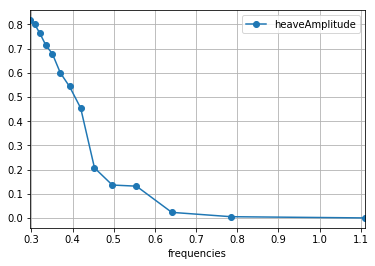

In [7]:
speed = 10.0
result_speed = output_file.results[speed]
result_180 = result_speed[180]
vertical_plane_responses= result_180.verticalPlaneResponses
df=pd.DataFrame(data=vertical_plane_responses.__dict__)
df.set_index('frequencies', inplace=True)
df.head()

fig,ax=plt.subplots()
df.plot(y='heaveAmplitude', style='o-', ax=ax)
ax.grid(True)

But this can also be done automatically for all speeds and wave directions:

c:\python35-32\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


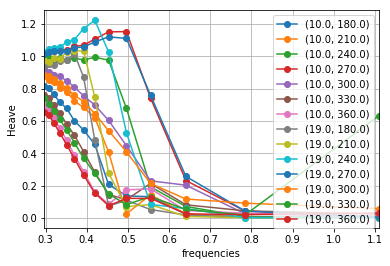

In [8]:
df = output_file.get_result()

fig,ax=plt.subplots()
for index, group in df.groupby(by=['speed','wave direction']):
    group.plot(x='frequencies', y='heaveAmplitude', style='o-', label=index, ax=ax)
    
ax.grid(True)
ax.legend();
ax.set_ylabel('Heave');

It is also possible to get the roll damping:

In [9]:
df_roll_damping = output_file.get_roll_damping()
df_roll_damping


,calculated_wave_damping_in_roll,critical_wave_damping_in_roll,natural_roll_frequency,roll_damping_ratio,speed,wave_direction
0,3264.0,5052000.0,0.24734,0.040500,10.0,240.0
1,3264.0,5052000.0,0.24734,0.021220,10.0,210.0
2,3264.0,5052000.0,0.24734,0.006722,10.0,180.0
3,NaN,NaN,NaN,NaN,10.0,360.0
4,NaN,NaN,NaN,NaN,10.0,330.0
5,3264.0,5052000.0,0.24734,0.006875,10.0,300.0
6,3264.0,5052000.0,0.24734,0.020810,10.0,270.0
7,3264.0,5052000.0,0.24734,0.039530,19.0,240.0
8,3264.0,5052000.0,0.24734,0.009088,19.0,210.0
9,3264.0,5052000.0,0.24734,0.002214,19.0,180.0
